<center><b><i>CREDIT CARD FRAUD DETECTION<i><b></center>

<center><b><i>IMPORTING NECESSARY LIBRARIES<i><b></center>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<center><b><i>READ THE CSV FILE<i><b></center>

In [47]:
df=pd.read_csv('creditcard_data.csv')

<center><b><i>OBSERVE THE HEAD AND TAIL OF THE DATAFRAME<i><b></center>

In [48]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<center><b><i>DATA ANALYSIS BEFORE FITTING THE MODEL<i><b></center>

In [50]:
valid_transactions=df.loc[df['Class']==0]
fraud_transactions=df.loc[df['Class']==1]

In [51]:
print(len(valid_transactions))

284314


In [52]:
print(len(fraud_transactions))

492


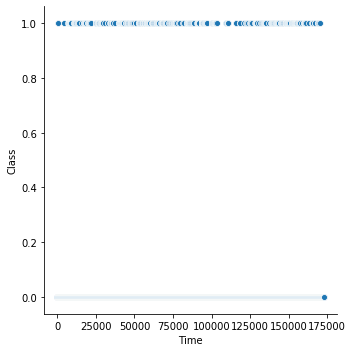

In [53]:
sns.relplot(x='Time',y='Class',data=df)

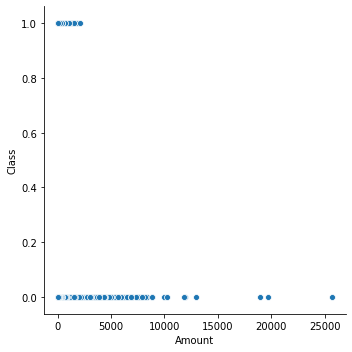

In [54]:
sns.relplot(x='Amount',y='Class',data=df)

(array([42., 47., 80., 63., 44., 63., 21., 33., 56., 43.]),
 array([   406. ,  17400.2,  34394.4,  51388.6,  68382.8,  85377. ,
        102371.2, 119365.4, 136359.6, 153353.8, 170348. ]),
 <a list of 10 Patch objects>)

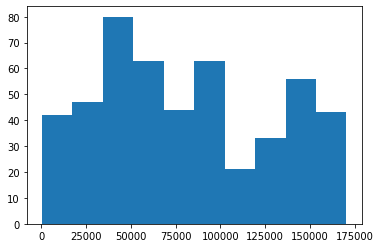

In [55]:
plt.hist(x='Time',data=fraud_transactions)

(array([410.,  40.,  17.,  14.,   2.,   2.,   4.,   1.,   1.,   1.]),
 array([   0.   ,  212.587,  425.174,  637.761,  850.348, 1062.935,
        1275.522, 1488.109, 1700.696, 1913.283, 2125.87 ]),
 <a list of 10 Patch objects>)

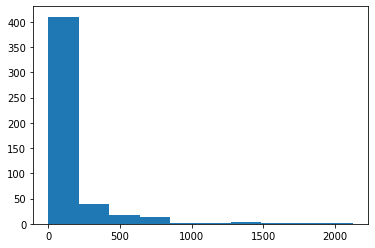

In [56]:
plt.hist(x='Amount',data=fraud_transactions)

<center><b><i>IMPORTING THE LIBRARIES FOR SPLITTING DATA,MODEL FITTING AND PREDICTION PURPOSE<i><b></center>

In [57]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

<center><b><i>SPLITTING THE DATASET<i><b></center>

In [58]:
X=df.drop(['Class'],axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

In [59]:
model=linear_model.LogisticRegression()

<center><b><i>FITTING THE LOGISTIC REGRESSION MODEL<i><b></center>

In [60]:
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<center><b><i>PREDICTING THE OUTPUT ON TEST SET AND STORING IT<i><b></center>

In [61]:
y_predict=model.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [63]:
print(confusion_matrix(y_test,y_predict))

[[198961     75]
 [    91    238]]


In [64]:
print(accuracy_score(y_test,y_predict))

0.9991673563564317


<center><b><i>PRINTING THE CLASSIFICATION REPORT WHICH CONTAINS THE PRECISION AND RECALL VALUES AS THEY ARE AN IMPORTANT FACTOR OF THE PERFROMANCE OF OUR MODEL AS THE DATASET IS HIGHLY UNBALANCED THE REASON BEING THAT NO. OF FRADULENT TRANSACTION ARE WAY LESSER THAN THE NO OF VALID TRANSACTIONS.SUCH ANALYSIS OF PRECISION AND RECALL BECOMES IMPORTANT IN THESE TYPE OF DATASETS<i><b></center>

In [65]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199036
           1       0.76      0.72      0.74       329

    accuracy                           1.00    199365
   macro avg       0.88      0.86      0.87    199365
weighted avg       1.00      1.00      1.00    199365



<center><b><i>DONE WITH IT<i><b></center>